In [3]:
import json
import importlib
import graphing_results as g

storage_file = "generation_results.json"

with open(storage_file, "r") as f:
    test_results = json.load(f)

model_prefixes = ['lichess_karvhyp']  # Replace with your model prefixes
#model_prefixes = ['lichess_8layers_ckpt_no']
datasets_to_include = ['random100games', 'lichess13_100g_180m']  # Replace with your datasets

print(f"Evaluated models are {test_results.keys()}")
for model in model_prefixes:
    print(f"Evaluated checkpoints for model {model} are {test_results[model].keys()}")


Evaluated models are dict_keys(['lichess9gb_8layer', 'random16M_8layer', 'big_random16M_vocab32', 'lichess9gb_vocab32', 'small_random10gb_vocab32', 'gb_lichess9gb_vocab32', 'lichess_8layers_ckpt_no', 'lichess_karvhyp'])
Evaluated checkpoints for model lichess_karvhyp are dict_keys(['100K', '200K', '300K', '400K', '500K', '250K', '350K', '450K', '550K', '600K'])


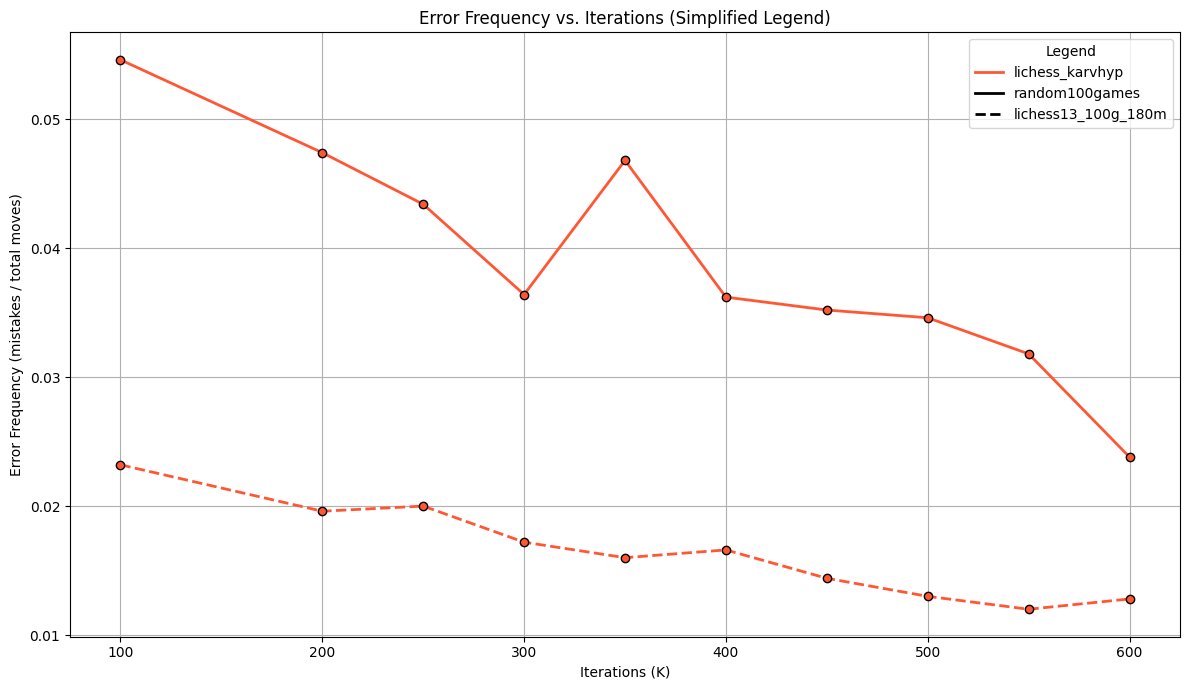

In [4]:

importlib.reload(g)

g.plot_error_frequencies(test_results,model_prefixes, datasets_to_include, [50])


In [6]:
importlib.reload(g)

#model_names = ["random16M_8layer_50K", "random16M_8layer_100K", "lichess9gb_8layer_50K","lichess9gb_8layer_100K"]
model_names = ["random16M_8layer_22K", "random16M_8layer_50K", "random16M_8layer_80K","random16M_8layer_100K"]
datasets = ['random100games']
max_moves_considered = 100
max_games_considered = 30


g.plot_error_cloud(test_results,model_names,datasets,max_moves_considered,max_games_considered)

AttributeError: module 'graphing_results' has no attribute 'plot_error_cloud'